# Sorghum Flowering Predictions with Ensemble Models

In [17]:
#important libraries
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor,GradientBoostingRegressor,RandomForestRegressor,\
StackingRegressor,VotingRegressor,HistGradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error,explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, RepeatedKFold
from matplotlib import pyplot
from scipy.stats import sem
from numpy import mean
from numpy import std

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px

import itertools
from itertools import permutations
pd.set_option("display.max_rows", None, "display.max_columns", None)
sns.set()

%matplotlib inline

## Import Train and Test Data

In [18]:
df = pd.read_csv('../../../data/data-1.4-red.csv',index_col = 0)
df.head(3)

PlotID Treatment   PI       CHL       EWT       LWC        SLA      N  \
0    5004        HN  NaN  468.6625  0.031408  0.748322  94.669000  3.761   
1    5005        HN  NaN  559.1375  0.031563  0.732255  86.647953  3.180   
2    5006        HN  NaN  568.8375  0.030689  0.716905  82.517814  3.161   

       P     K     Mg     Ca      S     Fe    Mn    B    Cu    Zn      X350  \
0  0.372  1.49  0.209  0.726  0.200  123.0  28.0  4.4  14.7  39.0  0.051370   
1  0.454  2.32  0.184  0.542  0.192  162.0  28.0  4.2  11.0  35.0  0.060103   
2  0.355  1.76  0.169  0.577  0.174  176.0  27.0  4.7  11.4  31.0  0.099085   

       X351      X352      X353      X354      X355      X356      X357  \
0  0.052746  0.045821  0.052313  0.083602  0.062361  0.049722  0.059869   
1  0.049632  0.045581  0.067715  0.117364  0.081665  0.061088  0.077107   
2  0.113754  0.114285  0.109921  0.113212  0.119975  0.100022  0.062165   

       X358      X359      X360      X361      X362      X363      X364  \
0  0.056525  0.061510  0.053292  0.032932  0.040317  0.062231  0.070485   
1  0.068005  0.072490  0.064835  0.043043  0.049886  0.063621  0.065962   
2  0.049947  0.069289  0.077344  0.060909  0.061961  0.067800  0.066358   

       X365      X366      X367      X368      X369      X370      X371  \
0  0.052649  0.041792  0.042909  0.043065  0.032088  0.044064  0.046019   
1  0.051330  0.043448  0.041333  0.039668  0.035503  0.045181  0.046671   
2  0.054756  0.053663  0.052614  0.051131  0.052293  0.058782  0.059387   

       X372      X373      X374      X375      X376      X377      X378  \
0  0.038522  0.043813  0.047412  0.047961  0.046872  0.047312  0.048542   
1  0.040810  0.043458  0.050485  0.052210  0.047122  0.044935  0.047376   
2  0.054000  0.050389  0.053716  0.050787  0.041124  0.042028  0.043616   

       X379      X380      X381      X382      X383      X384      X385  \
0  0.048327  0.045896  0.044430  0.043528  0.044992  0.049225  0.047608   
1  0.047966  0.043590  0.042818  0.040720  0.040671  0.045761  0.044807   
2  0.044856  0.045758  0.044086  0.046838  0.048902  0.044437  0.044277   

       X386      X387      X388      X389      X390      X391      X392  \
0  0.047901  0.048735  0.043370  0.042375  0.045063  0.047908  0.045674   
1  0.047601  0.050887  0.044123  0.043528  0.045290  0.044929  0.040516   
2  0.045808  0.046552  0.045058  0.043993  0.043806  0.042900  0.037509   

       X393      X394      X395      X396      X397      X398      X399  \
0  0.041191  0.040956  0.046317  0.043229  0.042814  0.045638  0.047879   
1  0.038967  0.041709  0.045823  0.040394  0.040797  0.045123  0.045981   
2  0.041162  0.045486  0.043184  0.042651  0.039952  0.037677  0.039974   

       X400      X401      X402      X403      X404      X405      X406  \
0  0.047047  0.044441  0.041939  0.041561  0.044752  0.046757  0.045050   
1  0.047368  0.047117  0.045181  0.043589  0.046269  0.047893  0.045604   
2  0.045524  0.046478  0.043937  0.045681  0.044032  0.041172  0.041084   

       X407      X408      X409      X410      X411      X412      X413  \
0  0.041494  0.043331  0.047099  0.048029  0.046650  0.048133  0.051203   
1  0.042084  0.044874  0.048860  0.048547  0.048192  0.049840  0.052071   
2  0.048657  0.051887  0.049826  0.046015  0.047787  0.052214  0.053085   

       X414      X415      X416      X417      X418      X419      X420  \
0  0.051696  0.050021  0.049206  0.050117  0.051099  0.050420  0.049987   
1  0.052230  0.052194  0.052084  0.052235  0.053210  0.051567  0.050060   
2  0.046039  0.049368  0.051306  0.048266  0.047596  0.049694  0.052982   

       X421      X422      X423      X424      X425      X426      X427  \
0  0.050363  0.046971  0.048846  0.051978  0.050416  0.050639  0.051851   
1  0.050250  0.048140  0.050010  0.052219  0.050339  0.052283  0.054480   
2  0.054911  0.051374  0.049807  0.050570  0.051625  0.052918  0.053335   

       X428      X429      X430      X431      X432      X433      X43

### Calculate Principal Components

In [19]:
#filuter reflectance columns
sub = df[df.columns[18:-1]] #reflectance data
sub.head(3)

,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X381,X382,X383,X384,X385,X386,X387,X388,X389,X390,X391,X392,X393,X394,X395,X396,X397,X398,X399,X400,X401,X402,X403,X404,X405,X406,X407,X408,X409,X410,X411,X412,X413,X414,X415,X416,X417,X418,X419,X420,X421,X422,X423,X424,X425,X426,X427,X428,X429,X430,X431,X432,X433,X434,X435,X436,X437,X438,X439,X440,X441,X442,X443,X444,X445,X446,X447,X448,X449,X450,X451,X452,X453,X454,X455,X456,X457,X458,X459,X460,X461,X462,X463,X464,X465,X466,X467,X468,X469,X470,X471,X472,X473,X474,X475,X476,X477,X478,X479,X480,X481,X482,X483,X484,X485,X486,X487,X488,X489,X490,X491,X492,X493,X494,X495,X496,X497,X498,X499,X500,X501,X502,X503,X504,X505,X506,X507,X508,X509,X510,X511,X512,X513,X514,X515,X516,X517,X518,X519,X520,X521,X522,X523,X524,X525,X526,X527,X528,X529,X530,X531,X532,X533,X534,X535,X536,X537,X538,X539,X540,X541,X542,X543,X544,X545,X546,X547,X548,X549,X550,X551,X552,X553,X554,X555,X556,X557,X558,X559,X560,X561,X562,X563,X564,X565,X566,X567,X568,X569,X570,X571,X572,X573,X574,X575,X576,X577,X578,X579,X580,X581,X582,X583,X584,X585,X586,X587,X588,X589,X590,X591,X592,X593,X594,X595,X596,X597,X598,X599,X600,X601,X602,X603,X604,X605,X606,X607,X608,X609,X610,X611,X612,X613,X614,X615,X616,X617,X618,X619,X620,X621,X622,X623,X624,X625,X626,X627,X628,X629,X630,X631,X632,X633,X634,X635,X636,X637,X638,X639,X640,X641,X642,X643,X644,X645,X646,X647,X648,X649,X650,X651,X652,X653,X654,X655,X656,X657,X658,X659,X660,X661,X662,X663,X664,X665,X666,X667,X668,X669,X670,X671,X672,X673,X674,X675,X676,X677,X678,X679,X680,X681,X682,X683,X684,X685,X686,X687,X688,X689,X690,X691,X692,X693,X694,X695,X696,X697,X698,X699,X700,X701,X702,X703,X704,X705,X706,X707,X708,X709,X710,X711,X712,X713,X714,X715,X716,X717,X718,X719,X720,X721,X722,X723,X724,X725,X726,X727,X728,X729,X730,X731,X732,X733,X734,X735,X736,X737,X738,X739,X740,X741,X742,X743,X744,X745,X746,X747,X748,X749,X750,X751,X752,X753,X754,X755,X756,X757,X758,X759,X760,X761,X762,X763,X764,X765,X766,X767,X768,X769,X770,X771,X772,X773,X774,X775,X776,X777,X778,X779,X780,X781,X782,X783,X784,X785,X786,X787,X788,X789,X790,X791,X792,X793,X794,X795,X796,X797,X798,X799,X800,X801,X802,X803,X804,X805,X806,X807,X808,X809,X810,X811,X812,X813,X814,X815,X816,X817,X818,X819,X820,X821,X822,X823,X824,X825,X826,X827,X828,X829,X830,X831,X832,X833,X834,X835,X836,X837,X838,X839,X840,X841,X842,X843,X844,X845,X846,X847,X848,X849,X850,X851,X852,X853,X854,X855,X856,X857,X858,X859,X860,X861,X862,X863,X864,X865,X866,X867,X868,X869,X870,X871,X872,X873,X874,X875,X876,X877,X878,X879,X880,X881,X882,X883,X884,X885,X886,X887,X888,X889,X890,X891,X892,X893,X894,X895,X896,X897,X898,X899,X900,X901,X902,X903,X904,X905,X906,X907,X908,X909,X910,X911,X912,X913,X914,X915,X916,X917,X918,X919,X920,X921,X922,X923,X924,X925,X926,X927,X928,X929,X930,X931,X932,X933,X934,X935,X936,X937,X938,X939,X940,X941,X942,X943,X944,X945,X946,X947,X948,X949,X950,X951,X952,X953,X954,X955,X956,X957,X958,X959,X960,X961,X962,X963,X964,X965,X966,X967,X968,X969,X970,X971,X972,X973,X974,X975,X976,X977,X978,X979,X980,X981,X982,X983,X984,X985,X986,X987,X988,X989,X990,X991,X992,X993,X994,X995,X996,X997,X998,X999,X1000,X1001,X1002,X1003,X1004,X1005,X1006,X1007,X1008,X1009,X1010,X1011,X1012,X1013,X1014,X1015,X1016,X1017,X1018,X1019,X1020,X1021,X1022,X1023,X1024,X1025,X1026,X1027,X1028,X1029,X1030,X1031,X1032,X1033,X1034,X1035,X1036,X1037,X1038,X1039,X1040,X1041,X1042,X1043,X1044,X1045,X1046,X1047,X1048,X1049,X1050,X1051,X1052,X1053,X1054,X1055,X1056,X1057,X1058,X1059,X1060,X1061,X1062,X1063,X1064,X1065,X1066,X1067,X1068,X1069,X1070,X1071,X1072,X1073,X1074,X1075,X1076,X1077,X1078,X1079,X1080,X1081,X1082,X1083,X1084,X1085,X1086,X1087,X1088,X1089,X1090,X1091,X1092,X1093,X1094,X1095,X1096,X1097,X1098,X1099,X1100,X1101,X1102,X1103,X1104,X1105,X1106,X1107,X1108,X1109,X1110,X1111,X1112,X1113,X1114,X1115,X1116,X1117,X1118,X1119,X1120,X1121,X1122,X1123,X1124

In [20]:
n_components =50
pca = PCA(n_components)
sub_trans = pca.fit_transform(sub.values)
sub_df = pd.DataFrame(data = sub_trans
         , columns = ["PC"+str(i) for i in list(range(1,n_components+1))])
sub_df.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,-0.762364,0.438182,-0.336755,-0.120509,-0.029328,0.035228,-0.089227,-0.024867,-0.017986,-0.013983,0.000543,-0.009501,0.018867,0.020099,0.023933,-0.025237,-0.001044,0.005164,-0.003208,0.006477,0.009954,-0.008735,-0.006702,0.020329,-0.010589,0.003271,-0.001472,-0.000113,0.001082,-0.014808,-0.003076,0.008571,0.007876,-0.005512,-0.007918,-0.001763,-0.000721,-0.002435,-0.000849,-0.002426,-0.001307,-0.002181,0.002748,0.001599,-0.003366,-0.000559,0.002042,-0.002288,-0.004250,0.005611
1,-1.142898,0.298222,-0.481114,-0.111638,-0.025892,0.005820,-0.057168,-0.014043,-0.047752,-0.023340,0.007233,-0.007827,0.032561,0.022671,0.021911,-0.018265,0.001464,-0.001966,-0.001067,0.005579,-0.000464,0.004598,-0.003146,0.006435,-0.014364,0.012692,0.003675,0.007261,0.002606,-0.006139,0.001593,-0.001701,-0.002979,-0.012335,-0.007994,-0.004594,0.001649,0.000864,0.000782,-0.007000,0.001293,0.000081,-0.000168,0.002528,-0.007130,0.002126,-0.000477,-0.000594,-0.007157,0.004029
2,-0.977220,0.194467,-0.339300,-0.046891,-0.098290,0.027528,0.026620,-0.021951,0.006686,-0.058457,-0.010702,-0.013376,0.003734,0.024829,0.048368,0.009014,-0.029887,0.016543,-0.002050,-0.022084,0.006804,0.001214,0.001260,0.007833,-0.000360,-0.012186,-0.006870,-0.008098,0.006071,-0.004186,0.001277,-0.001186,-0.006195,-0.007616,-0.007362,-0.009581,-0.002092,-0.000217,0.005157,0.002164,0.000100,-0.010017,-0.000732,0.000237,-0.001022,-0.000445,-0.005699,0.000485,0.005090,-0.000414


Text(0.5, 1.0, 'PCs vs. Explained Variance')

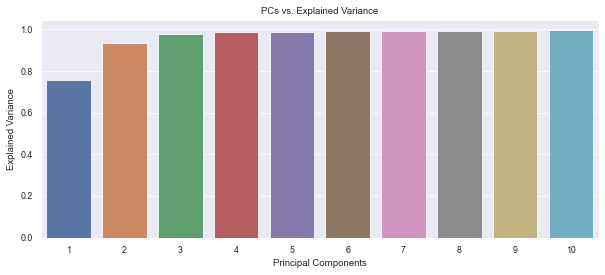

In [21]:
total_var = pca.explained_variance_ratio_.sum() * 100
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize = (10,4))
sns.set_context('paper')
sns.barplot(x = list(range(1,11,1)), y = exp_var_cumul[:10])
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance")
plt.title("PCs vs. Explained Variance")

In [22]:
#attach treatement and target variable on PCs
sub_df['DaysToBloom'] = df['DaysToBloom']
sub_df['treatment'] = df.Treatment
sub_df.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,DaysToBloom,treatment
0,-0.762364,0.438182,-0.336755,-0.120509,-0.029328,0.035228,-0.089227,-0.024867,-0.017986,-0.013983,0.000543,-0.009501,0.018867,0.020099,0.023933,-0.025237,-0.001044,0.005164,-0.003208,0.006477,0.009954,-0.008735,-0.006702,0.020329,-0.010589,0.003271,-0.001472,-0.000113,0.001082,-0.014808,-0.003076,0.008571,0.007876,-0.005512,-0.007918,-0.001763,-0.000721,-0.002435,-0.000849,-0.002426,-0.001307,-0.002181,0.002748,0.001599,-0.003366,-0.000559,0.002042,-0.002288,-0.004250,0.005611,71.0,HN
1,-1.142898,0.298222,-0.481114,-0.111638,-0.025892,0.005820,-0.057168,-0.014043,-0.047752,-0.023340,0.007233,-0.007827,0.032561,0.022671,0.021911,-0.018265,0.001464,-0.001966,-0.001067,0.005579,-0.000464,0.004598,-0.003146,0.006435,-0.014364,0.012692,0.003675,0.007261,0.002606,-0.006139,0.001593,-0.001701,-0.002979,-0.012335,-0.007994,-0.004594,0.001649,0.000864,0.000782,-0.007000,0.001293,0.000081,-0.000168,0.002528,-0.007130,0.002126,-0.000477,-0.000594,-0.007157,0.004029,71.0,HN
2,-0.977220,0.194467,-0.339300,-0.046891,-0.098290,0.027528,0.026620,-0.021951,0.006686,-0.058457,-0.010702,-0.013376,0.003734,0.024829,0.048368,0.009014,-0.029887,0.016543,-0.002050,-0.022084,0.006804,0.001214,0.001260,0.007833,-0.000360,-0.012186,-0.006870,-0.008098,0.006071,-0.004186,0.001277,-0.001186,-0.006195,-0.007616,-0.007362,-0.009581,-0.002092,-0.000217,0.005157,0.002164,0.000100,-0.010017,-0.000732,0.000237,-0.001022,-0.000445,-0.005699,0.000485,0.005090,-0.000414,62.0,HN


### Train Test Split

In [23]:
## Data Split
X = sub_df[sub_df.columns[:-2]]
y = sub_df[['treatment','DaysToBloom']]
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30)

train_data = pd.concat([X_train, y_train], axis = 1)
print(f"Train Dataset: {train_data.shape[0]} row/records. F: {train_data[train_data.treatment=='HN'].shape[0]} and N: {train_data[train_data.treatment =='LN'].shape[0]}\n")

test_data = pd.concat([X_test,y_test], axis = 1)
print(f"Train Dataset: {test_data.shape[0]} row/records. F: {test_data[test_data.treatment=='HN'].shape[0]} and N: {test_data[test_data.treatment =='LN'].shape[0]}")



Train Dataset: 578 row/records. F: 215 and N: 363

Train Dataset: 249 row/records. F: 80 and N: 169


In [24]:
#features
features = list(sub_df.columns)[:-2]

## Important Functions

In [25]:
# evaluate a model with a given number of repeats
def evaluate_model(model,X, y, repeats):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    # create model
    # estimators= 100
    # model = RandomForestRegressor(n_estimators = estimators)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
    return scores

## RF  - Both Treatment

In [26]:
## Initialize Models with default parameters
estimators = 100
models = [("AdaBoost", AdaBoostRegressor()),('Random Forest', RandomForestRegressor(estimators)),
          ('Gradient Boosting', GradientBoostingRegressor()),('Bagging', BaggingRegressor()),
          ('ExtraTrees', ExtraTreesRegressor(estimators)),
           ('HistGradient Boosting', HistGradientBoostingRegressor())]

stack_models  = models[0:3]
stack = StackingRegressor(stack_models,stack_models[-2][1])
voting = VotingRegressor(models)
models.append(('Stacking Regressor',stack))
models.append(('Voting Regressor',stack))

In [29]:
sub_df.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,DaysToBloom,treatment
0,-0.762364,0.438182,-0.336755,-0.120509,-0.029328,0.035228,-0.089227,-0.024867,-0.017986,-0.013983,0.000543,-0.009501,0.018867,0.020099,0.023933,-0.025237,-0.001044,0.005164,-0.003208,0.006477,0.009954,-0.008735,-0.006702,0.020329,-0.010589,0.003271,-0.001472,-0.000113,0.001082,-0.014808,-0.003076,0.008571,0.007876,-0.005512,-0.007918,-0.001763,-0.000721,-0.002435,-0.000849,-0.002426,-0.001307,-0.002181,0.002748,0.001599,-0.003366,-0.000559,0.002042,-0.002288,-0.004250,0.005611,71.0,HN
1,-1.142898,0.298222,-0.481114,-0.111638,-0.025892,0.005820,-0.057168,-0.014043,-0.047752,-0.023340,0.007233,-0.007827,0.032561,0.022671,0.021911,-0.018265,0.001464,-0.001966,-0.001067,0.005579,-0.000464,0.004598,-0.003146,0.006435,-0.014364,0.012692,0.003675,0.007261,0.002606,-0.006139,0.001593,-0.001701,-0.002979,-0.012335,-0.007994,-0.004594,0.001649,0.000864,0.000782,-0.007000,0.001293,0.000081,-0.000168,0.002528,-0.007130,0.002126,-0.000477,-0.000594,-0.007157,0.004029,71.0,HN


In [32]:
## Initialize Models with default parameters
X = sub_df[list(sub_df.columns)[:-2]]
y = sub_df['DaysToBloom']
results = list()
for model in models:
    print(f"Model: {model[0]}")
    for i in range(1,6):
        scores = evaluate_model(model[1], X,y,i)
        # summarize
        print('>%d mean=%.4f se=%.3f' % (i, mean(scores), sem(scores)))
        # store
        results.append(scores)

# cv = KFold(n_splits=10, random_state=1, shuffle=True)
# # evaluate model
# scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
# scores

Model: AdaBoost
>1 mean=-0.0514 se=0.030
>2 mean=-0.0522 se=0.018
>3 mean=-0.0566 se=0.014
>4 mean=-0.0663 se=0.011
>5 mean=-0.0674 se=0.011
Model: Random Forest
>1 mean=-0.0238 se=0.012
>2 mean=-0.0284 se=0.011
>3 mean=-0.0198 se=0.009
>4 mean=-0.0109 se=0.009
>5 mean=-0.0196 se=0.008
Model: Gradient Boosting
>1 mean=-0.0611 se=0.021
>2 mean=-0.0701 se=0.020
>3 mean=-0.0669 se=0.017
>4 mean=-0.0708 se=0.014
>5 mean=-0.0762 se=0.013
Model: Bagging
>1 mean=-0.1036 se=0.029
>2 mean=-0.0817 se=0.015
>3 mean=-0.1152 se=0.017
>4 mean=-0.1167 se=0.016
>5 mean=-0.1145 se=0.014
Model: ExtraTrees
>1 mean=-0.0023 se=0.013
>2 mean=-0.0122 se=0.011
>3 mean=-0.0125 se=0.010
>4 mean=-0.0132 se=0.008
>5 mean=-0.0102 se=0.008
Model: HistGradient Boosting
>1 mean=-0.1161 se=0.022
>2 mean=-0.1410 se=0.022
>3 mean=-0.1292 se=0.019
>4 mean=-0.1265 se=0.016
>5 mean=-0.1215 se=0.015
Model: Stacking Regressor
>1 mean=-0.1292 se=0.028
>2 mean=-0.1352 se=0.014
>3 mean=-0.1544 se=0.020
>4 mean=-0.1643 se=0.012


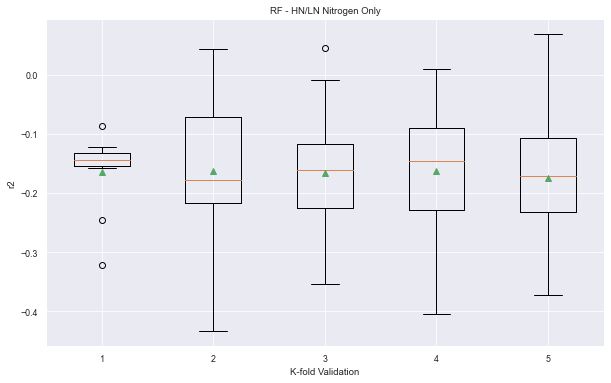

In [27]:
plt.figure(figsize = (10,6))
pyplot.boxplot(results, labels=[str(r) for r in range(1,6)], showmeans=True)
plt.ylabel("r2")
plt.xlabel("K-fold Validation")
plt.title("RF - HN/LN Nitrogen Only")
pyplot.show()

## RF - Full Nitrogen


In [34]:
X = sub_df[sub_df.treatment =="HN"][list(sub_df.columns)[:-2]]
y = sub_df[sub_df.treatment =="HN"]['DaysToBloom']
results = list()
for model in models:
    print(f"Model: {model[0]}")
    for i in range(1,6):
        scores = evaluate_model(model[1],X,y,i)
        # summarize
        print('>%d mean=%.4f se=%.3f' % (i, mean(scores), sem(scores)))
        # store
        results.append(scores)

# cv = KFold(n_splits=10, random_sta

Model: AdaBoost
>1 mean=-0.2408 se=0.098
>2 mean=-0.2710 se=0.055
>3 mean=-0.2315 se=0.037
>4 mean=-0.2167 se=0.031
>5 mean=-0.2335 se=0.028
Model: Random Forest
>1 mean=-0.1818 se=0.075
>2 mean=-0.1332 se=0.044
>3 mean=-0.1294 se=0.029
>4 mean=-0.1422 se=0.026
>5 mean=-0.1366 se=0.020
Model: Gradient Boosting
>1 mean=-0.3554 se=0.109
>2 mean=-0.2991 se=0.064
>3 mean=-0.3093 se=0.046
>4 mean=-0.3012 se=0.038
>5 mean=-0.2945 se=0.034
Model: Bagging
>1 mean=-0.3446 se=0.113
>2 mean=-0.2658 se=0.062
>3 mean=-0.2924 se=0.050
>4 mean=-0.2333 se=0.032
>5 mean=-0.2281 se=0.030
Model: ExtraTrees
>1 mean=-0.1751 se=0.063
>2 mean=-0.1355 se=0.043
>3 mean=-0.1507 se=0.029
>4 mean=-0.1403 se=0.025
>5 mean=-0.1542 se=0.020
Model: HistGradient Boosting
>1 mean=-0.3184 se=0.124
>2 mean=-0.2805 se=0.068
>3 mean=-0.2736 se=0.048
>4 mean=-0.2820 se=0.039
>5 mean=-0.2723 se=0.032
Model: Stacking Regressor
>1 mean=-0.1706 se=0.070
>2 mean=-0.2534 se=0.042
>3 mean=-0.2968 se=0.037
>4 mean=-0.2250 se=0.038


In [ ]:
plt.figure(figsize = (10,6))
pyplot.boxplot(results, labels=[str(r) for r in range(1,6)], showmeans=True)
plt.ylabel("r2")
plt.xlabel("K-fold Validation")
plt.title("RF - High Nitrogen Only")
pyplot.show()

## RF - Nitrogen Deprived

In [35]:
X = sub_df[sub_df.treatment =="LN"][list(sub_df.columns)[:-2]]
y = sub_df[sub_df.treatment =="LN"]['DaysToBloom']
results = list()
for model in models:
    print(f"Model: {model[0]}")
    for i in range(1,6):
        scores = evaluate_model(model[1],X,y,i)
        # summarize
        print('>%d mean=%.4f se=%.3f' % (i, mean(scores), sem(scores)))
        # store
        results.append(scores)

# cv = KFold(n_splits=10, random_sta

Model: AdaBoost
>1 mean=-0.1696 se=0.042
>2 mean=-0.1622 se=0.024
>3 mean=-0.1406 se=0.019
>4 mean=-0.1470 se=0.017
>5 mean=-0.1338 se=0.013
Model: Random Forest
>1 mean=-0.0655 se=0.031
>2 mean=-0.0761 se=0.020
>3 mean=-0.0762 se=0.014
>4 mean=-0.0717 se=0.013
>5 mean=-0.0694 se=0.010
Model: Gradient Boosting
>1 mean=-0.1461 se=0.044
>2 mean=-0.1667 se=0.031
>3 mean=-0.1637 se=0.023
>4 mean=-0.1650 se=0.019
>5 mean=-0.1699 se=0.016
Model: Bagging
>1 mean=-0.1532 se=0.032
>2 mean=-0.1787 se=0.035
>3 mean=-0.1559 se=0.025
>4 mean=-0.1498 se=0.022
>5 mean=-0.1666 se=0.016
Model: ExtraTrees
>1 mean=-0.0480 se=0.031
>2 mean=-0.0543 se=0.019
>3 mean=-0.0711 se=0.016
>4 mean=-0.0613 se=0.014
>5 mean=-0.0546 se=0.012
Model: HistGradient Boosting
>1 mean=-0.1886 se=0.054
>2 mean=-0.2161 se=0.038
>3 mean=-0.2183 se=0.031
>4 mean=-0.2128 se=0.025
>5 mean=-0.2180 se=0.021
Model: Stacking Regressor
>1 mean=-0.2047 se=0.039
>2 mean=-0.1291 se=0.024
>3 mean=-0.1716 se=0.024
>4 mean=-0.1929 se=0.027


In [ ]:
plt.figure(figsize = (10,6))
pyplot.boxplot(results, labels=[str(r) for r in range(1,6)], showmeans=True)
plt.ylabel("r2")
plt.xlabel("K-fold Validation")
plt.title("RF - Low Nitrogen Only")
pyplot.show()